IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.metrics import f1_score

LOAD THE DATA

In [2]:
heart_data = pd.read_csv('python _data.csv')

DATA SIZE

In [3]:
heart_data.shape

(1025, 14)

In [4]:
heart_data.describe()
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


1--> DEFECTIVE HEART  , 0--> HEALTHY HEART

In [5]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [6]:
x= heart_data.isnull().sum()
print(x)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
x=heart_data.drop(columns='target' , axis=1)
y=heart_data['target']

TRAIN-TEST SPLIT [80-20]

In [8]:
x_train, x_test , y_train , y_test =train_test_split(x,y , random_state=42 , test_size=0.2 , stratify=y)

DATA PREPROCESSING

In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

LOGISTIC REGRESSION

In [10]:
log_model=LogisticRegression()
log_model.fit(x_train_scaled , y_train)

LogisticRegression()

KNN

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

DECISION TREE

In [12]:
tree_model = DecisionTreeClassifier(random_state=2)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=2)

In [13]:
m1=log_model.predict(x_test_scaled)
m2=knn_model.predict(x_test_scaled)
m3=tree_model.predict(x_test_scaled)

C:\Users\namee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ACCURACY OF THE THREE MODELS

In [14]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, m1))
print("KNN Accuracy:", accuracy_score(y_test, m2))
print("Decision Tree Accuracy:", accuracy_score(y_test, m3))

Logistic Regression Accuracy: 0.8097560975609757
KNN Accuracy: 0.8634146341463415
Decision Tree Accuracy: 0.44390243902439025


In [15]:
log_probs = log_model.predict_proba(x_test_scaled)[:, 1]
knn_probs = knn_model.predict_proba(x_test_scaled)[:, 1]
tree_probs = tree_model.predict_proba(x_test)[:, 1]

In [16]:
log_fpr, log_tpr, _ = roc_curve(y_test, log_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
tree_fpr, tree_tpr, _ = roc_curve(y_test, tree_probs)

log_auc = roc_auc_score(y_test, log_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
tree_auc = roc_auc_score(y_test, tree_probs)

ROC CURVE

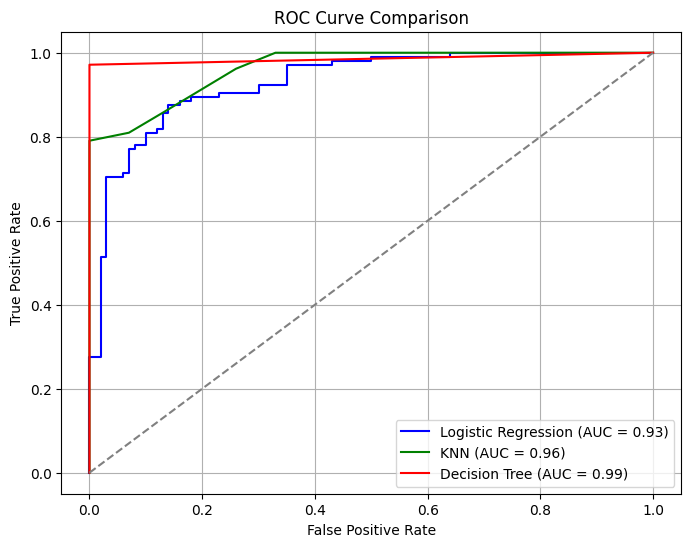

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_auc:.2f})', color='blue')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})', color='green')
plt.plot(tree_fpr, tree_tpr, label=f'Decision Tree (AUC = {tree_auc:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

CORRELATION OF THE TARGET WITH OTHER VARIABLES

In [18]:
t=heart_data.corr().head()
print(t)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.103240 -0.071966  0.271121  0.219823  0.121243   
sex      -0.103240  1.000000 -0.041119 -0.078974 -0.198258  0.027200   
cp       -0.071966 -0.041119  1.000000  0.038177 -0.081641  0.079294   
trestbps  0.271121 -0.078974  0.038177  1.000000  0.127977  0.181767   
chol      0.219823 -0.198258 -0.081641  0.127977  1.000000  0.026917   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.132696 -0.390227  0.088163  0.208137 -0.169105  0.271551   
sex      -0.055117 -0.049365  0.139157  0.084687 -0.026666  0.111729   
cp        0.043581  0.306839 -0.401513 -0.174733  0.131633 -0.176206   
trestbps -0.123794 -0.039264  0.061197  0.187434 -0.120445  0.104554   
chol     -0.147410 -0.021772  0.067382  0.064880 -0.014248  0.074259   

              thal    target  
age       0.072297 -0.229324  
sex       0.198424 -0.279501  
cp       -0.163341  0.434854  
trestbps  

PRECISION-RECALL CURVE

C:\Users\namee\AppData\Local\Temp\ipykernel_14728\1536245928.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


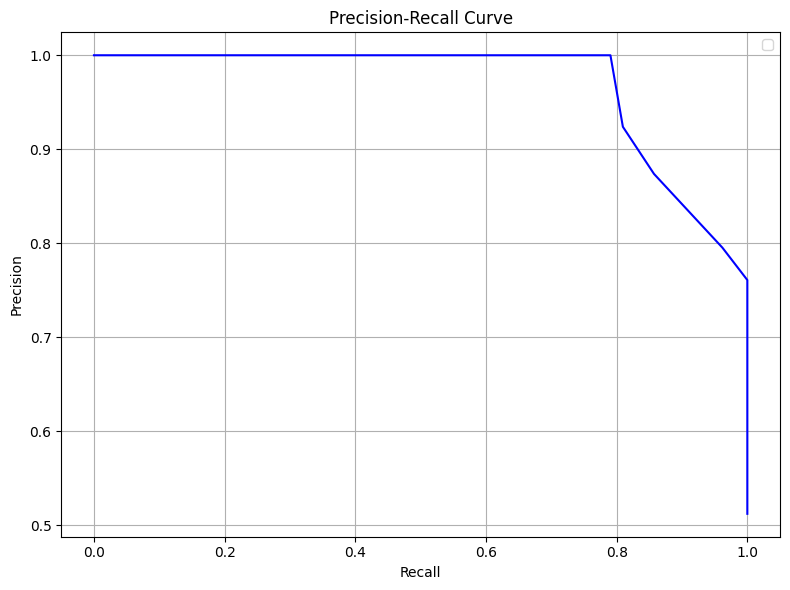

In [19]:
precision, recall, thresholds = precision_recall_curve(y_test, knn_probs)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

F1_Score

In [20]:
f1_logistic = f1_score(y_test, m1)
f1_knn = f1_score(y_test, m2)
f1_tree = f1_score(y_test, m3)

print("F1 Score - Logistic Regression:", f1_logistic)
print("F1 Score - KNN:", f1_knn)
print("F1 Score - Decision Tree:", f1_tree)

F1 Score - Logistic Regression: 0.8311688311688312
F1 Score - KNN: 0.8653846153846154
F1 Score - Decision Tree: 0.5365853658536586


BUILDING PREDICTIVE SYSTEM

In [25]:
input_data=(71,0,0,112,149,0,1,125,0,1.6,1,0,2)

#change the input data into numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one datapoint
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = knn_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The person does not have a Heart Disease')
else:
  print('The Pesron has a Heart Disease')

[0]
The person does not have a Heart Disease
